In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Import data and data exploration

In [2]:
ds = pd.read_csv("heart.csv")

In [3]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Features of dataset:

__age__: The person's age in years

__sex__: The person's sex (1 = male, 0 = female)

__cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

__trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital)

__chol__: The person's cholesterol measurement in mg/dl

__fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

__restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

__thalach__: The person's maximum heart rate achieved

__exang__: Exercise induced angina (1 = yes; 0 = no)

__oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

__slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

__ca__: The number of major vessels (0-3)

__thal__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

__target__: Heart disease (0 = no, 1 = yes)

In [18]:
# top 5 rows
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# data info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [19]:
ds.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# shape of the data
ds.shape

(303, 14)

In [7]:
# summary statistics
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ACD231DA0>,
      dtype=object)

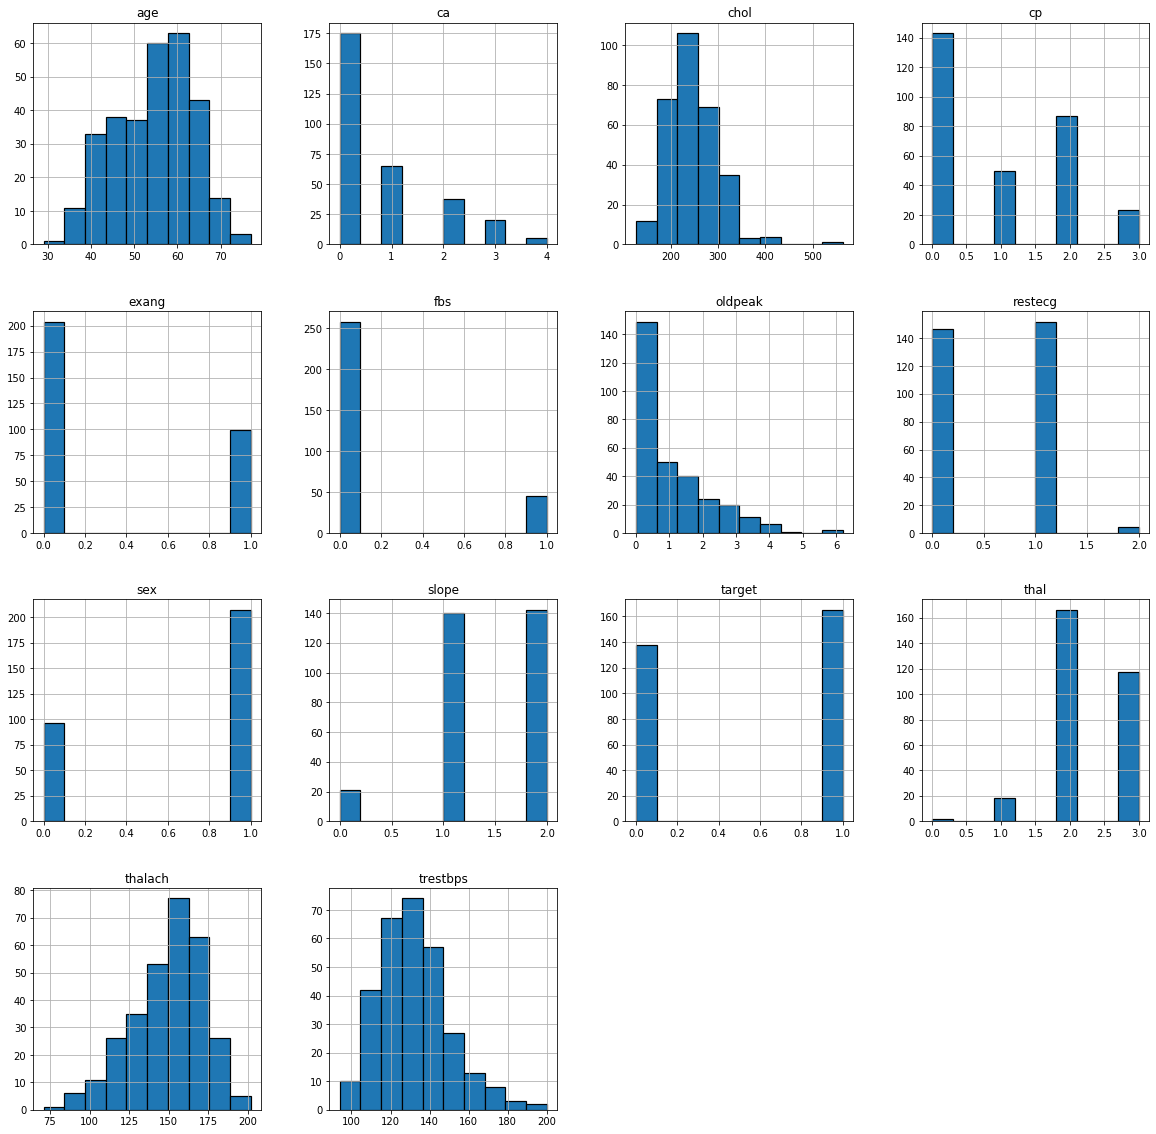

In [13]:
# distribution of every feature
ds.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [97]:
# check for missing values

ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploration of Features

In [20]:
# analysis of 'target'
ds['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### age

__age__: The person's age in years

In [44]:
ds['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

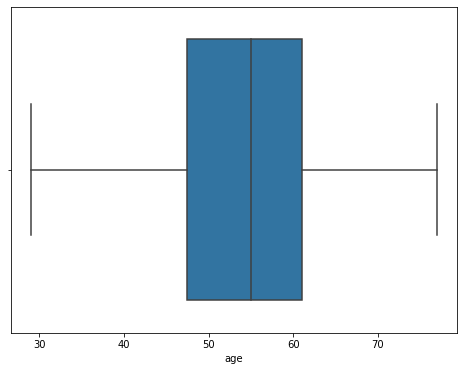

In [89]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["age"])
plt.show()

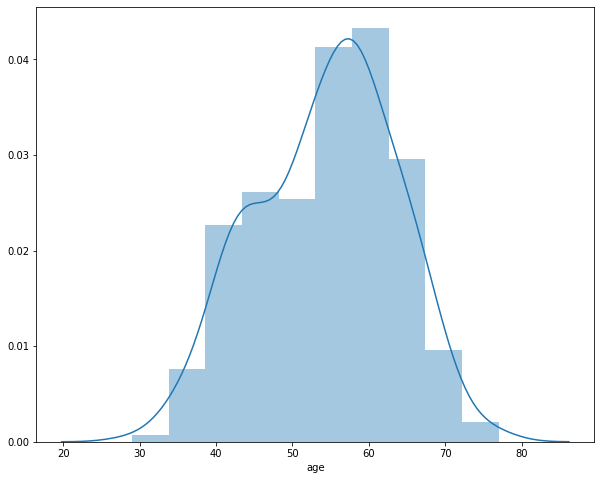

In [56]:
f, ax = plt.subplots(figsize=(10,8))
x = ds['age']
ax = sns.distplot(x, bins=10)
plt.show()

The distribution figure of age is almost a normal distribution.

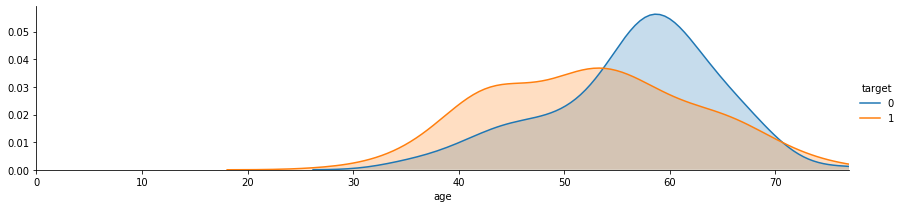

In [60]:
fig = sns.FacetGrid(ds, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)

oldest = ds['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

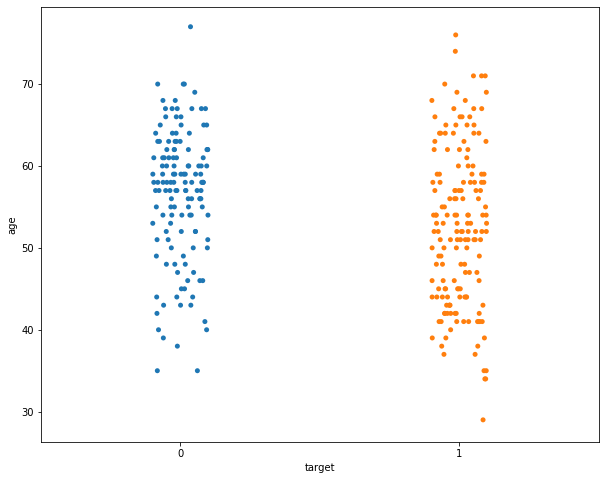

In [62]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="age", data=ds)
plt.show()

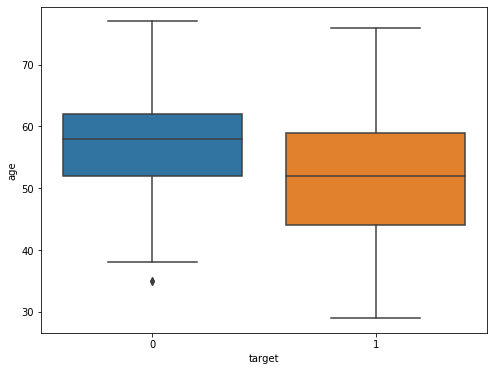

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=ds)
plt.show()

Patients with heart disease have a smaller average age and a wider age distribution.

### trestbps

__trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital)

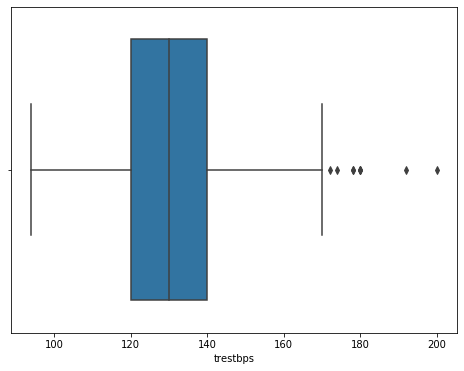

In [88]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["trestbps"])
plt.show()

trestbps variable contains outliers to the right side.

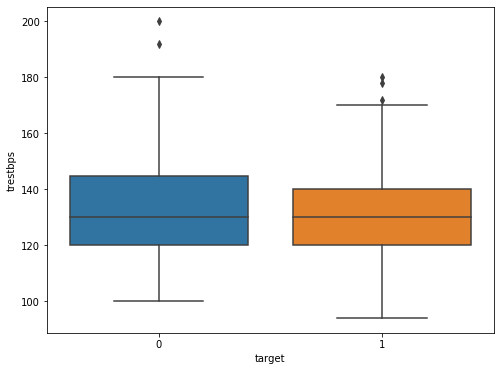

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="trestbps", data=ds)
plt.show()

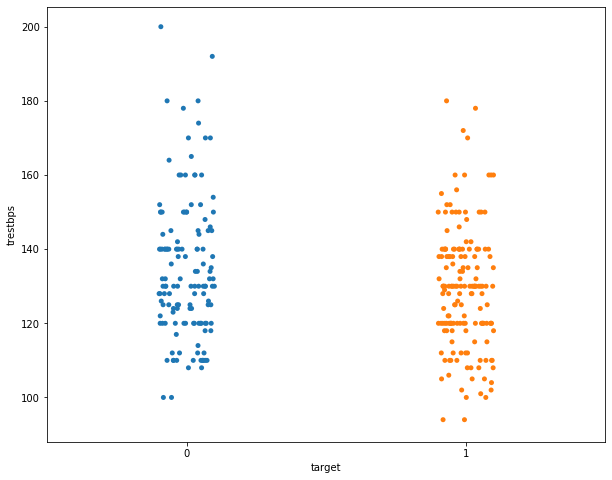

In [67]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="trestbps", data=ds)
plt.show()

### chol

__chol__: The person's cholesterol measurement in mg/dl

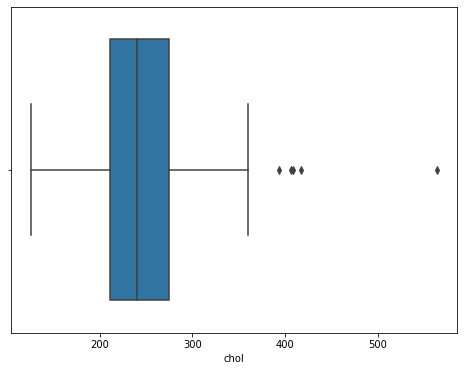

In [90]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["chol"])
plt.show()

outliners to the right side

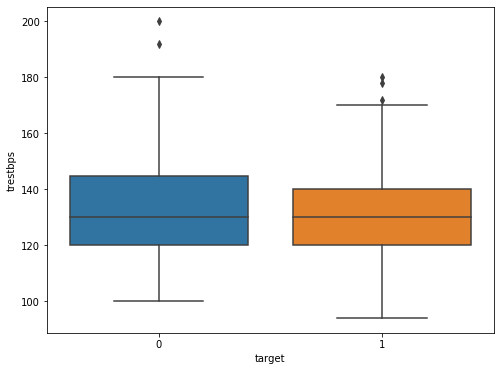

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="trestbps", data=ds)
plt.show()

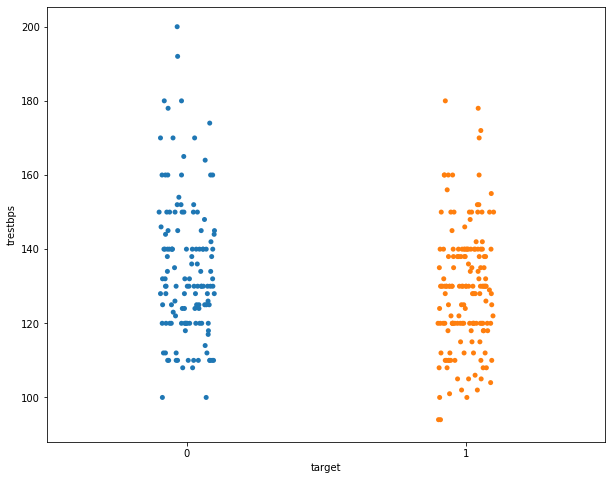

In [95]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="trestbps", data=ds)
plt.show()

### thalach

__thalach__: The person's maximum heart rate achieved

In [74]:
ds['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

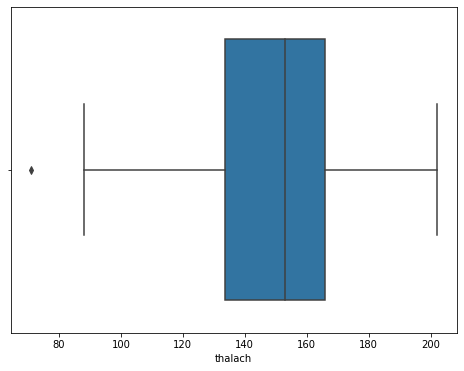

In [91]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["thalach"])
plt.show()

One outliner to the left side.

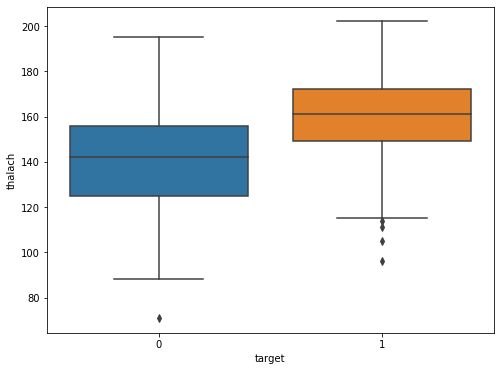

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=ds)
plt.show()

The maximum heart rate achieved by people with heart disease is much higher than those without disease.

### oldpeak

__oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

In [78]:
ds['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

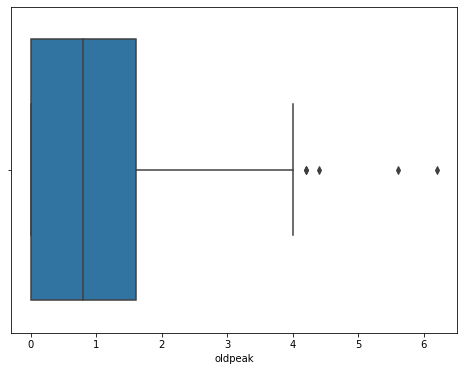

In [93]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["oldpeak"])
plt.show()

Outliners to the right side

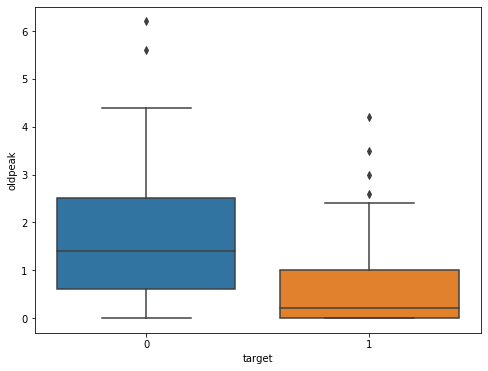

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="oldpeak", data=ds)
plt.show()

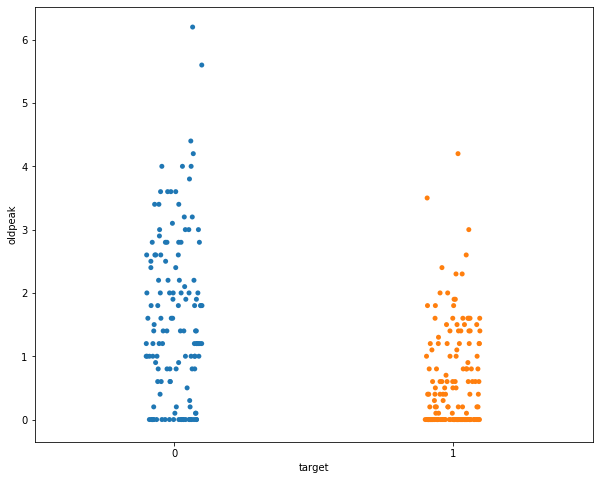

In [77]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="oldpeak", data=ds)
plt.show()

The 'oldpeak' of patients with heart disease is below 2

### restecg

__restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [70]:
ds.groupby('restecg')['target'].value_counts()

restecg  target
0        0         79
         1         68
1        1         96
         0         56
2        0          3
         1          1
Name: target, dtype: int64

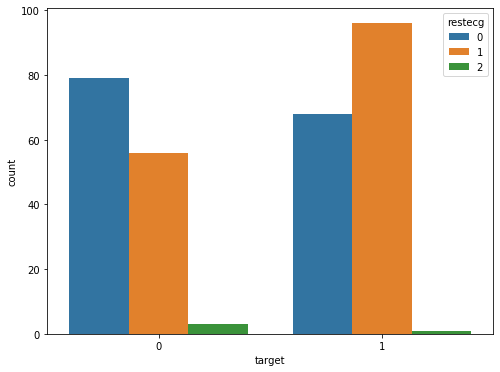

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="restecg",data=ds)
plt.show()

### sex

__sex__: The person's sex (1 = male, 0 = female)

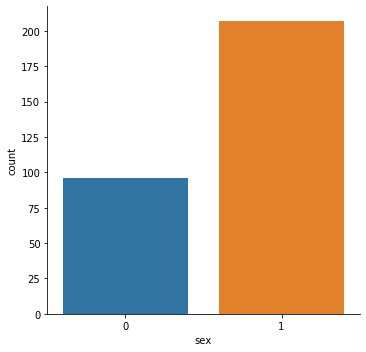

In [15]:
# analyis of 'target' with 'sex'
# counts of gender
sns.catplot('sex', data=ds, kind='count')

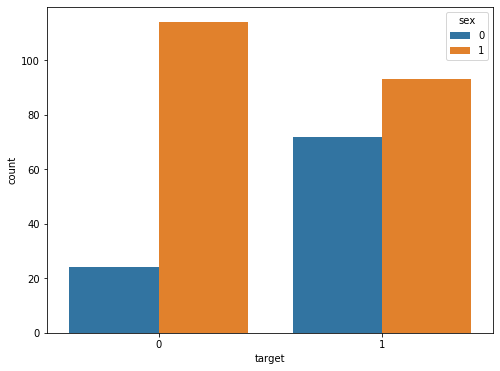

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="sex",data=ds)
plt.show()

In [21]:
ds.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

In [34]:
72/(72+24) * 100

75.0

In [35]:
93/(114+93) * 100

44.927536231884055

75.00% female patients have heart disease.(72 out of 96) 

44.92% male patients have heart disease.(93 out of 207)

### fbs

__fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)  

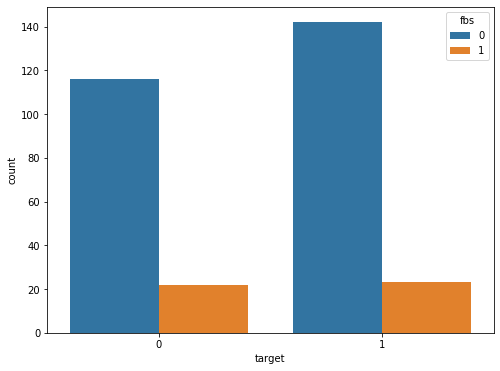

In [24]:
# analysis of fbs(fasting blood sugar)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=ds)
plt.show()

In [39]:
ds.groupby('fbs')['target'].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

It seems that the impact of fbs on target is not great.

### exang

__exang__: Exercise induced angina (1 = yes; 0 = no)  

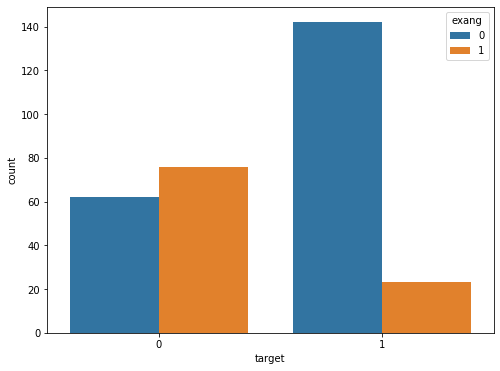

In [29]:
# analysis of exang (exercise induced angina)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=ds)
plt.show()

In [36]:
ds.groupby('exang')['target'].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

In [38]:
142/(142+23) * 100

86.06060606060606

86% patients with heart disease do not have exercise induced angina.  
Obviously, most patients with heart disease do not have Exercise induce angina.

### cp

__cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 

In [43]:
ds['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

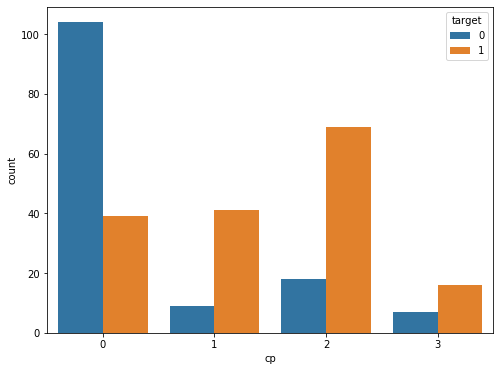

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=ds)
plt.show()

In [41]:
ds.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

When cp is greater than or equal to 1, the chance of heart disease is greatly increased

### slope

__slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [79]:
ds['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

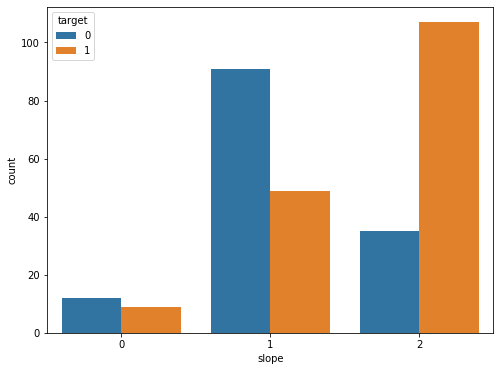

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="slope", hue="target", data=ds)
plt.show()

In [81]:
ds.groupby('slope')['target'].value_counts()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64

The probability of a patient with  downsloping(slope=2) suffering from heart disease is much greater than the other two types.

### ca

__ca__: The number of major vessels (0-3)

In [84]:
ds.groupby('ca')['target'].value_counts()

ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64

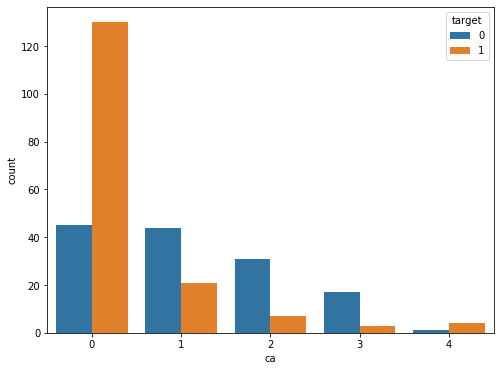

In [85]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="ca", hue="target", data=ds)
plt.show()

Most of patients with heart disease have 0 major vessel.

### thal

__thal__: A blood disorder called thalassemia 

In [86]:
ds.groupby('thal')['target'].value_counts()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64

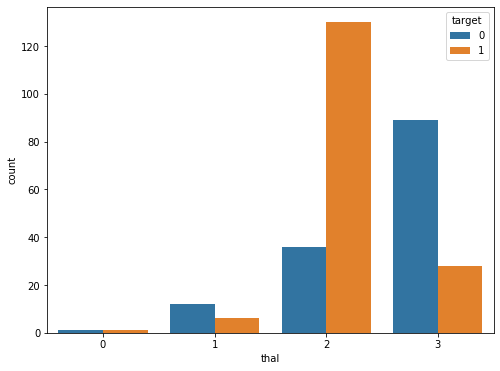

In [87]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="thal", hue="target", data=ds)
plt.show()

The blood discover result of most of patients with heart disease is 2.

### Correlation Heatmap

To discover patterns and relationships between variables in the dataset

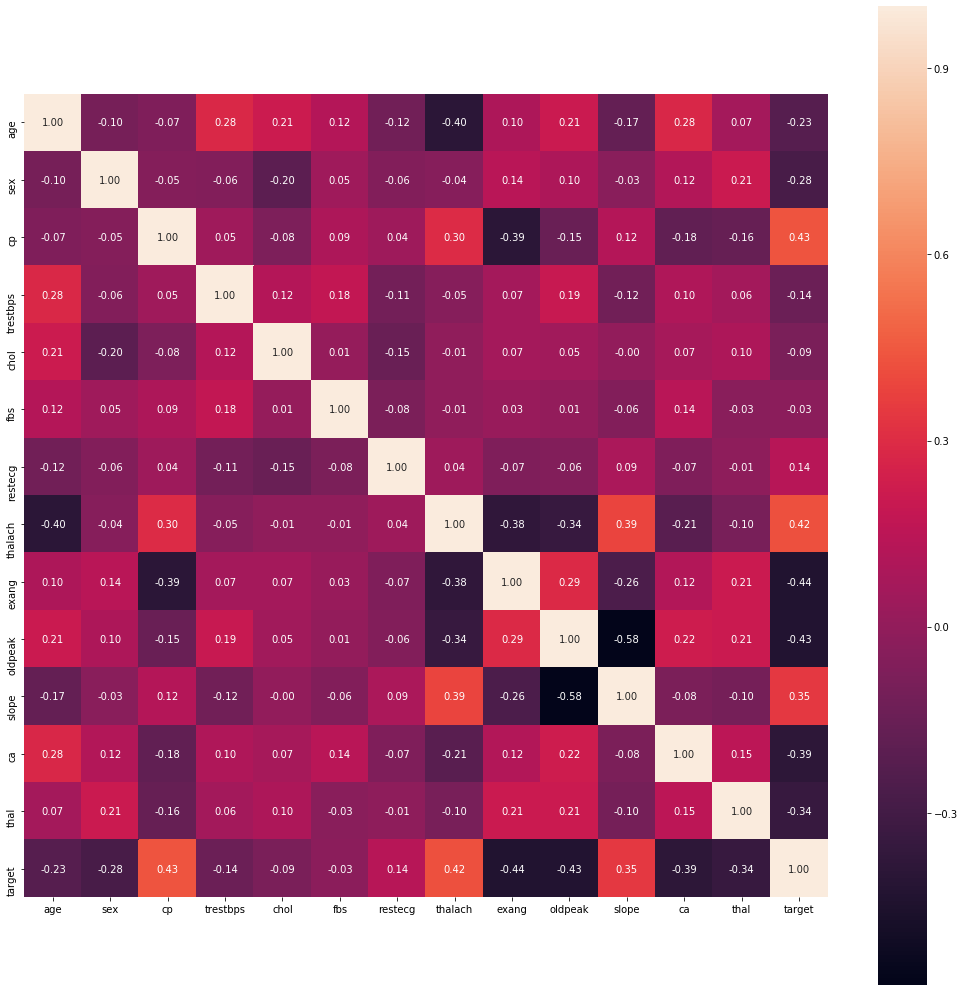

In [104]:
corr = ds.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, square=True, annot=True, fmt='.2f')        

From the heat map above, we can find that:  
The attributes that are slightly positively correlated with the target are __cp(0.43), thalach(0.42), slope(0.35)__.  
The attributes that are slightly negatively correlated with the target are __exang(-0.44), oldpeak(-0.43), ca(-0.39),thal(-0.34)__.   

## Data Processing

In [ ]:
Since